<a href="https://colab.research.google.com/github/Vrajmotiwala/AI-ML-sillycone/blob/main/TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vrajmotiwala","key":"116c25ddca0f6b0045b05c8a63a2d4fe"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!pip install -q kaggle

In [5]:
!kaggle datasets download -d mexwell/student-scores

Dataset URL: https://www.kaggle.com/datasets/mexwell/student-scores
License(s): other
  0% 0.00/61.9k [00:00<?, ?B/s]
100% 61.9k/61.9k [00:00<00:00, 178MB/s]


In [6]:
import zipfile

In [7]:
!unzip student-scores.zip

Archive:  student-scores.zip
  inflating: student-scores.csv      


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import sklearn

In [11]:
data=pd.read_csv('student-scores.csv')

In [12]:
data

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,alan.reynolds.1996@gslingacademy.com,male,False,2,False,30,Construction Engineer,83,77,84,73,75,84,82
1996,1997,Thomas,Gilbert,thomas.gilbert.1997@gslingacademy.com,male,False,2,False,20,Software Engineer,89,65,73,80,87,67,73
1997,1998,Madison,Cross,madison.cross.1998@gslingacademy.com,female,False,5,False,14,Software Engineer,97,85,63,93,68,94,78
1998,1999,Brittany,Compton,brittany.compton.1999@gslingacademy.com,female,True,10,True,5,Business Owner,51,96,72,89,95,88,75


In [15]:
data.dtypes

,0
id,int64
first_name,object
last_name,object
email,object
gender,object
part_time_job,bool
absence_days,int64
extracurricular_activities,bool
weekly_self_study_hours,int64
career_aspiration,object


In [16]:
data['Scores']=data[['math_score','history_score','physics_score','chemistry_score','biology_score','english_score','geography_score']].sum(axis=1)

In [17]:
data.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,Scores
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,574
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,640
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,605
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86,551
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,521


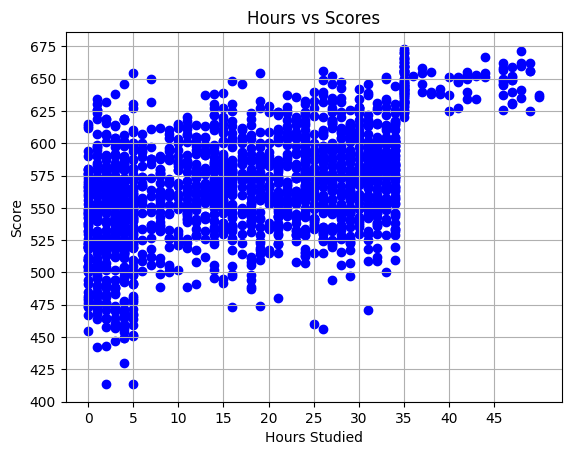

In [26]:
plt.scatter(data['weekly_self_study_hours'], data['Scores'], color='blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.yticks(range(400, 700, 25))
plt.xticks(range(0,50,5))
plt.grid(True)
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [21]:
X=data[['weekly_self_study_hours']]
y=data[['Scores']]
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [27]:
lr=LinearRegression()

In [28]:
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
X_test

,weekly_self_study_hours
674,22
1699,7
1282,3
1315,27
1210,28
...,...
400,16
763,19
385,23
1667,42


In [30]:
y_test

,Scores
674,584
1699,573
1282,558
1315,567
1210,562
...,...
400,608
763,559
385,604
1667,653


In [33]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[548.56068975]])

In [34]:
y_pred = lr.predict(X_test)

In [35]:
y_pred

array([[574.23064646],
       [548.56068975],
       [541.71536797],
       [582.78729869],
       [584.49862914],
       [577.65330735],
       [543.42669841],
       [570.80798556],
       [538.29270707],
       [536.58137663],
       [589.63262048],
       [570.80798556],
       [562.25133333],
       [579.3646378 ],
       [551.98335065],
       [596.47794226],
       [603.32326405],
       [577.65330735],
       [545.13802886],
       [570.80798556],
       [565.67399422],
       [584.49862914],
       [541.71536797],
       [543.42669841],
       [543.42669841],
       [586.20995958],
       [538.29270707],
       [587.92129003],
       [543.42669841],
       [562.25133333],
       [545.13802886],
       [562.25133333],
       [545.13802886],
       [579.3646378 ],
       [550.2720202 ],
       [596.47794226],
       [617.01390762],
       [572.51931601],
       [581.07596824],
       [569.09665511],
       [551.98335065],
       [587.92129003],
       [591.34395092],
       [593

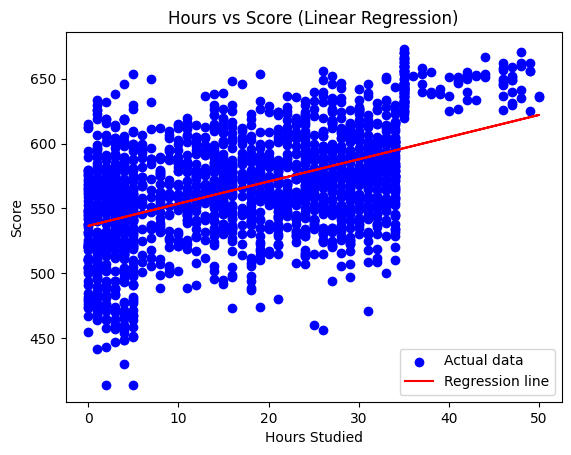

In [37]:
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, lr.predict(X), color='red', label='Regression line')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.title('Hours vs Score (Linear Regression)')
plt.legend()
plt.show()

#Slope of regression line

In [40]:
m=lr.coef_
m

array([[1.71133045]])

#Y intercept of Regression line

In [41]:
z=lr.intercept_
z

array([536.58137663])

In [42]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 1326.37


#error percentage

In [43]:
import math
rmse=math.sqrt(mse)
per=(rmse/700)*100
print(per,'%')

5.202758923344561 %
